In [1]:
from sklearn.datasets import fetch_openml # sklearn은 머신러닝에 가장 많이 쓰는 라이브러리

In [2]:
mnist = fetch_openml('mnist_784')

In [3]:
type(mnist)

sklearn.utils.Bunch

In [4]:
mnist

{'data':        pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
 0         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 1         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 2         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 3         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 4         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 ...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
 69995     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 69996     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 69997     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 69998     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 69999     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 
      

In [5]:
type(mnist.data)

pandas.core.frame.DataFrame

In [6]:
type(mnist.target)

pandas.core.series.Series

In [7]:
mnist.data.loc[0].min()

0.0

In [8]:
mnist.data.loc[0].max()

255.0

In [9]:
mnist.data.loc[0]

pixel1      0.0
pixel2      0.0
pixel3      0.0
pixel4      0.0
pixel5      0.0
           ... 
pixel780    0.0
pixel781    0.0
pixel782    0.0
pixel783    0.0
pixel784    0.0
Name: 0, Length: 784, dtype: float64

In [10]:
mnist.data.loc[0].shape

(784,)

In [11]:
mnist.target

0        5
1        0
2        4
3        1
4        9
        ..
69995    2
69996    3
69997    4
69998    5
69999    6
Name: class, Length: 70000, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

In [12]:
from sklearn.model_selection import train_test_split 
# 모델 학습
# 검증! (학습과 검증은 다른 데이터로 해야 됨)

In [13]:
X_train,X_test,Y_train,Y_test = train_test_split(mnist.data,mnist.target,test_size=0.1)
# 90%    10%  test_size= 0.1

In [14]:
type(Y_train)

pandas.core.series.Series

In [15]:
Y_train.value_counts()

1    7116
7    6553
3    6441
2    6319
9    6258
0    6206
6    6195
8    6143
4    6079
5    5690
Name: class, dtype: int64

In [16]:
Y_test.value_counts() #이상치 문자형 등 전처리 해야됨

1    761
4    745
7    740
3    700
9    700
0    697
8    682
6    681
2    671
5    623
Name: class, dtype: int64

In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [18]:
clf = RandomForestClassifier()
clf.fit(X_train,Y_train)
pred = clf.predict(X_test)
accuracy_score(Y_test,pred)

0.9701428571428572

In [19]:
import numpy as np
import matplotlib.pyplot as plt  #시각화 하기

In [20]:
n_test = len(X_test)
random_pic = np.random.randint(0,n_test,size=10)
random_pic

array([4705, 5454, 6262, 1118, 3174, 1023, 3697, 3677,  306, 2245])

In [21]:
X_test.iloc[3032]

pixel1      0.0
pixel2      0.0
pixel3      0.0
pixel4      0.0
pixel5      0.0
           ... 
pixel780    0.0
pixel781    0.0
pixel782    0.0
pixel783    0.0
pixel784    0.0
Name: 10704, Length: 784, dtype: float64

findfont: Font family ['malgunsl'] not found. Falling back to DejaVu Sans.


41995    6
16396    0
7543     6
6845     7
69946    1
10233    8
12561    5
19320    9
40446    9
60903    6
Name: class, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']


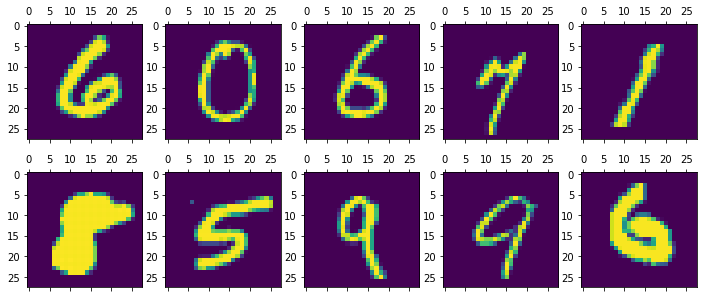

In [22]:
figure = plt.figure(figsize=(12,5))
axes = []
for i in range(1,11):
    axes.append(figure.add_subplot(2,5,i))
tmp_list=[]
for i in range(10):
    tmp = X_test.iloc[random_pic[i]]
    tmp = np.array(tmp)
    tmp = tmp.reshape(28,28)
    tmp_list.append(tmp)
    
print(Y_test.iloc[random_pic])
for i in range(10):
    axes[i].matshow(tmp_list[i])

In [23]:
import pickle

In [24]:
f = open('model','wb')
pickle.dump(clf,f)

In [25]:
f = open('model','rb')
model = pickle.load(f)

In [26]:
model.predict(X_test)

array(['4', '7', '4', ..., '0', '8', '1'], dtype=object)

In [27]:
import glob
from PIL import Image

예측값 ['4']


C:\Users\PKNU\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


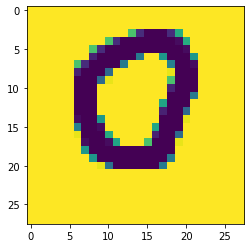

C:\Users\PKNU\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


예측값 ['2']


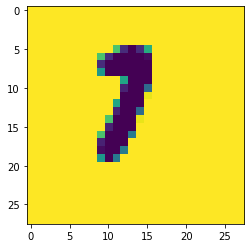

C:\Users\PKNU\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


예측값 ['2']


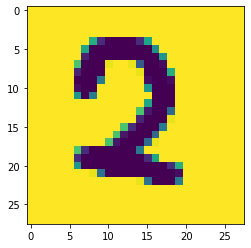

C:\Users\PKNU\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


예측값 ['3']


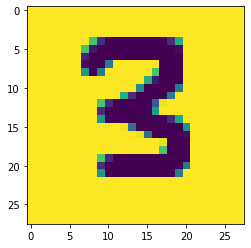

C:\Users\PKNU\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


예측값 ['2']


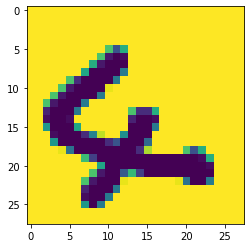

C:\Users\PKNU\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


예측값 ['5']


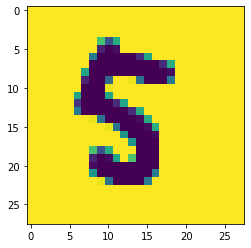

예측값 ['2']


C:\Users\PKNU\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


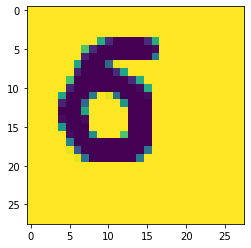

C:\Users\PKNU\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


예측값 ['7']


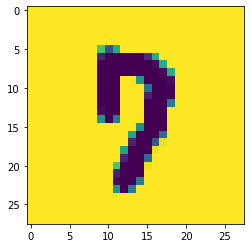

C:\Users\PKNU\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


예측값 ['6']


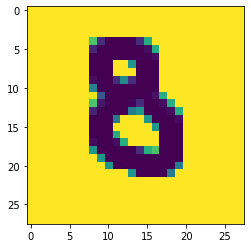

C:\Users\PKNU\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


예측값 ['8']


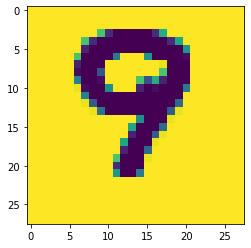

In [34]:
for path in glob.glob('./data/*.png'):
    #print(path)
    img = Image.open(path).convert('L')
    plt.imshow(img)
    #print(img)
    img = np.resize(img,(1,784))
    img = 255.0-img
    #print(img)
    pred = model.predict(img)
    print('예측값',pred)
    plt.show()